In [15]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from tqdm.notebook import tqdm
import multiprocessing as mp

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
backend = Aer.get_backend('qasm_simulator')

def parallel(args):
    model = args[0]
    x = args[1]
    y = args[2]
    verbose = args[3]
    
    model.train(x, y, verbose = verbose)
    
    return model

# Trainability, Ideal

## 1D, Gaussian Function

### Generate Data

In [17]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.2, 0.01) - gaussian(x, 0.5, 0.01) + gaussian(x, 0.8, 0.01)

x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(100, 1)


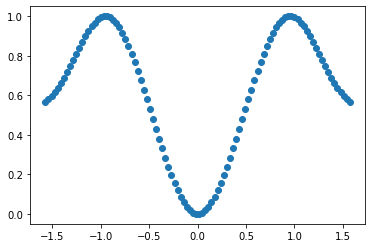

In [18]:
plt.plot(x_qcn, y, 'o')
plt.show()

### Training Models

In [11]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots = 0)
    
    qcn_list.append([qcn, x_qcn, y, False])

    
qcn_list[0][3] = True

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
    
saver(qcn_list, data_path("trainability_qcn_1D_reps_1"))

epoch: 0, loss: 0.14081725856495322
epoch: 1, loss: 0.12218127948324799
epoch: 2, loss: 0.11159762924623241
epoch: 3, loss: 0.09973295329258035
epoch: 4, loss: 0.08788048826130765
epoch: 5, loss: 0.07522901969429212
epoch: 6, loss: 0.05868457408361196
epoch: 7, loss: 0.04256620730947176
epoch: 8, loss: 0.03184672966793481
epoch: 9, loss: 0.026789651352350917
epoch: 10, loss: 0.02300728113781846
epoch: 11, loss: 0.01896895766838567
epoch: 12, loss: 0.015751098981688513
epoch: 13, loss: 0.01315123202034696
epoch: 14, loss: 0.010853290109319222
epoch: 15, loss: 0.007928079932426108
epoch: 16, loss: 0.005262863024656155
epoch: 17, loss: 0.004734152317330536
epoch: 18, loss: 0.006117339318444033
epoch: 19, loss: 0.006659604777229462
epoch: 20, loss: 0.005469015714841625
epoch: 21, loss: 0.004092134221492467
epoch: 22, loss: 0.0036396501292210114
epoch: 23, loss: 0.0036018735331683604
epoch: 24, loss: 0.0032680459067654165
epoch: 25, loss: 0.0028867927659748972
epoch: 26, loss: 0.00300974588

In [12]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         shots=0)
    
    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)     
    
saver(qcn_list, data_path("trainability_qcn_1D_reps_2"))

epoch: 0, loss: 0.1530543579647957
epoch: 1, loss: 0.08411293862964309
epoch: 2, loss: 0.08695614588945234
epoch: 3, loss: 0.06563699784519417
epoch: 4, loss: 0.037318441848250346
epoch: 5, loss: 0.023841717281163185
epoch: 6, loss: 0.02608004525145454
epoch: 7, loss: 0.02486742102346641
epoch: 8, loss: 0.018464607872809707
epoch: 9, loss: 0.015072543956755136
epoch: 10, loss: 0.015684929982633503
epoch: 11, loss: 0.014439573721482604
epoch: 12, loss: 0.01189909051971972
epoch: 13, loss: 0.01134299027180258
epoch: 14, loss: 0.010896518864616228
epoch: 15, loss: 0.010045964490913339
epoch: 16, loss: 0.010206294336565131
epoch: 17, loss: 0.008853001259006385
epoch: 18, loss: 0.006128191247238835
epoch: 19, loss: 0.0053361143389323825
epoch: 20, loss: 0.006032957207159386
epoch: 21, loss: 0.005757641665438011
epoch: 22, loss: 0.004872776553348238
epoch: 23, loss: 0.004358048374766876
epoch: 24, loss: 0.004104977176322313
epoch: 25, loss: 0.004238960931233941
epoch: 26, loss: 0.00464783081

In [19]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [1, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=100)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D_epochs_100"))

In [20]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [1, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D_epochs_10000"))

## 2D function

### Generate Data

In [23]:
np.random.seed(42)

n = 12
x = np.linspace(0, 1, n)
x = generate_meshgrid([x,x])

mean1 = np.array([[0.2, 0.8]])
var1 = np.array([[0.01, 0], [0, 0.01]])

mean2 = np.array([[0.5, 0.8]])
var2 = np.array([[0.01, 0], [0, 0.01]])

mean3 = np.array([[0.8, 0.8]])
var3 = np.array([[0.01, 0], [0, 0.01]])

mean4 = np.array([[0.2, 0.5]])
var4 = np.array([[0.01, 0], [0, 0.01]])

mean5 = np.array([[0.5, 0.5]])
var5 = np.array([[0.01, 0], [0, 0.01]])

mean6 = np.array([[0.8, 0.5]])
var6 = np.array([[0.01, 0], [0, 0.01]])

mean7 = np.array([[0.2, 0.2]])
var7 = np.array([[0.01, 0], [0, 0.01]])

mean8 = np.array([[0.5, 0.2]])
var8 = np.array([[0.01, 0], [0, 0.01]])

mean9 = np.array([[0.8, 0.2]])
var9 = np.array([[0.01, 0], [0, 0.01]])


y = gaussian(x, mean1, var1) - gaussian(x, mean2, var2) + gaussian(x, mean3, var3) - gaussian(x, mean4, var4) +\
gaussian(x, mean5, var5) - gaussian(x, mean6, var6) + gaussian(x, mean7, var7) - gaussian(x, mean8, var8) +\
gaussian(x, mean9, var9)


x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)

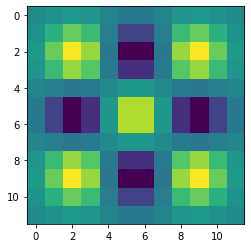

In [24]:
plt.imshow(y.reshape(n,n))
plt.show()

### Training Models

In [26]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4, 4],
                         dim = [2, 4, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=0)
    qcn_list.append([qcn, x_qcn, y, False])
    
qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   

saver(qcn_list, data_path("trainability_qcn_2D_reps_1"))

epoch: 0, loss: 0.09783735088606117
epoch: 1, loss: 0.06373078458353953
epoch: 2, loss: 0.0617285178205876
epoch: 3, loss: 0.05469282392788234
epoch: 4, loss: 0.05075490654825418
epoch: 5, loss: 0.047835554437980723
epoch: 6, loss: 0.04660724059785007
epoch: 7, loss: 0.045598964667709976
epoch: 8, loss: 0.043476618670068835
epoch: 9, loss: 0.040396470670807705
epoch: 10, loss: 0.03903326006257023
epoch: 11, loss: 0.03909610469295487
epoch: 12, loss: 0.03905794559356885
epoch: 13, loss: 0.03820819647726504
epoch: 14, loss: 0.03662139993038411
epoch: 15, loss: 0.0352118865546723
epoch: 16, loss: 0.034447654148563524
epoch: 17, loss: 0.0340536790777196
epoch: 18, loss: 0.0333509837367035
epoch: 19, loss: 0.032407860087998966
epoch: 20, loss: 0.03172596167928474
epoch: 21, loss: 0.031128909807777865
epoch: 22, loss: 0.030247218901869672
epoch: 23, loss: 0.029608191918649322
epoch: 24, loss: 0.029221284534123402
epoch: 25, loss: 0.02885029310191234
epoch: 26, loss: 0.0283726620688898
epoch:

In [27]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4, 4],
                         dim = [2, 4, 4, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend=backend,
                         shots=0)
   
    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list)   
    
saver(qcn_list, data_path("trainability_qcn_2D_reps_2"))

epoch: 0, loss: 0.08960496168871653
epoch: 1, loss: 0.09015198242521527
epoch: 2, loss: 0.07401824848241088
epoch: 3, loss: 0.05732993821546242
epoch: 4, loss: 0.04826012948735936
epoch: 5, loss: 0.050079276354196525
epoch: 6, loss: 0.0505027648985183
epoch: 7, loss: 0.048127901900601594
epoch: 8, loss: 0.0462132572911002
epoch: 9, loss: 0.04587222547959448
epoch: 10, loss: 0.0458837445329465
epoch: 11, loss: 0.04416705274399303
epoch: 12, loss: 0.0398841272907861
epoch: 13, loss: 0.03882971795373327
epoch: 14, loss: 0.03567620293412895
epoch: 15, loss: 0.03393152231647876
epoch: 16, loss: 0.03238278146844824
epoch: 17, loss: 0.030603555977391825
epoch: 18, loss: 0.030195177951087306
epoch: 19, loss: 0.029994091889296574
epoch: 20, loss: 0.02852096139781264
epoch: 21, loss: 0.026106110658141383
epoch: 22, loss: 0.024374094662271015
epoch: 23, loss: 0.02423719967683111
epoch: 24, loss: 0.024294517433738456
epoch: 25, loss: 0.022805035758399803
epoch: 26, loss: 0.020887442848670126
epoch

In [29]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [2, 5, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=100)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D_epochs_100"))

In [30]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [2, 5, 5, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D_epochs_10000"))

## 3D function

### Generate Data

In [34]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(216, 1)


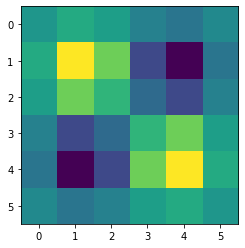

In [35]:
plt.imshow(y.reshape(n,n,n)[0])
plt.show()

In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [5, 5, 5],
                         dim = [3, 5, 5, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps = 1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 0)

    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
saver(qcn_list, data_path("trainability_qcn_3D_reps_1"))

epoch: 0, loss: 0.024215806789506855
epoch: 1, loss: 0.022827086737002997
epoch: 2, loss: 0.022070295859276466
epoch: 3, loss: 0.021569850449989804
epoch: 4, loss: 0.02024860756199184
epoch: 5, loss: 0.018401360450545617
epoch: 6, loss: 0.01632740732120656
epoch: 7, loss: 0.013638738943685592
epoch: 8, loss: 0.010933278153778604
epoch: 9, loss: 0.01126132100494103
epoch: 10, loss: 0.010275801598483457
epoch: 11, loss: 0.00942734312048578
epoch: 12, loss: 0.009621296764464273
epoch: 13, loss: 0.009529836796622308
epoch: 14, loss: 0.009203731273209111
epoch: 15, loss: 0.009370030533861472
epoch: 16, loss: 0.00909380477666458
epoch: 17, loss: 0.008936410374313756
epoch: 18, loss: 0.008952008817541716


In [ ]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [5, 5, 5],
                         dim = [3, 5, 5, 1],
                         encoder= Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps = 2),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend,
                         shots = 0)

    qcn_list.append([qcn, x_qcn, y, False])

qcn_list[0][3] = True    
    
with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
saver(qcn_list, data_path("trainability_qcn_3D_reps_2"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [3, 8, 8, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=100)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D_epochs_100"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [3, 8, 8, 1],
                         optimizer = Adam(lr=0.1))
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D_epochs_10000"))

# Trainability, Noisy

In [3]:
backend_santiago = pickle.load(open("backend_santiago", "rb"))

## 1D, Gaussian Data

### Generate data

In [4]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.2, 0.01) - gaussian(x, 0.5, 0.01) + gaussian(x, 0.8, 0.01)

x_qcn = scaler(x, a=-np.pi/2, b=np.pi/2)
x_dnn = scaler(x, mode="standard")
y = scaler(y, a=0, b=1)
print(y.shape)

(100, 1)


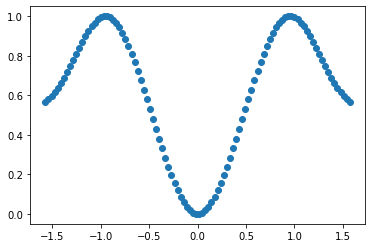

In [5]:
plt.plot(x_qcn, y, 'o')
plt.show()

### Training models

In [6]:
np.random.seed(42)

qcn_list = []
for i in range(10):
    qcn = sequential_qnn(n_qubits = [4, 4],
                         dim = [1, 4, 1],
                         encoder = Encoder(),
                         ansatz = Ansatz(blocks = ["entangle", "ry"], reps=1),
                         sampler = Parity(),
                         cost = MSE(),
                         optimizer = Adam(lr=0.1),
                         backend = backend_santiago,
                         shots = 8192)
    
    qcn_list.append([qcn, x_qcn, y, False])

    
qcn_list[0][3] = True

with mp.Pool(10) as p:
    qcn_list = p.map(parallel, qcn_list) 
    
saver(qcn_list, data_path("trainability_qcn_1D_reps_1_noisy"))

epoch: 0, loss: 0.14116189887302164
epoch: 1, loss: 0.12248295090363229
epoch: 2, loss: 0.11250269420402588
epoch: 3, loss: 0.10616333798002887
epoch: 4, loss: 0.09757624753238513
epoch: 5, loss: 0.08794267603754535
epoch: 6, loss: 0.07417260759845884
epoch: 7, loss: 0.06135294878786685
epoch: 8, loss: 0.05328782649160126
epoch: 9, loss: 0.051034924512023044
epoch: 10, loss: 0.04366365807739563
epoch: 11, loss: 0.03823363828391696
epoch: 12, loss: 0.03501960160647086
epoch: 13, loss: 0.031219152603103706
epoch: 14, loss: 0.027083290694734953
epoch: 15, loss: 0.02477528380217088
epoch: 16, loss: 0.02061730770744847
epoch: 17, loss: 0.021600236265254362
epoch: 18, loss: 0.019057734434734595
epoch: 19, loss: 0.01751063972223564
epoch: 20, loss: 0.015742868180815876
epoch: 21, loss: 0.015080866122253676
epoch: 22, loss: 0.013625957879584592
epoch: 23, loss: 0.013987704328860928
epoch: 24, loss: 0.013565494380335705
epoch: 25, loss: 0.012478381957743444
epoch: 26, loss: 0.011875328189383099

In [ ]:
22:32